In [13]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import analysis

In [14]:
width = 4
betas = np.arange(0.5,6.0,0.1)
runs = 10

In [15]:
# produce and store data
with h5py.File('data/equilibration.hdf5','a') as f:
    dataset = f"eq-times-w{width}"
    if not dataset in f:
        eq_times = np.empty((len(betas),runs))

        for i,beta in enumerate(betas):
            eq_times[i,:] = [analysis.time_until_convergence(width,beta) for _ in range(runs)]

        f.create_dataset(dataset,data=eq_times)

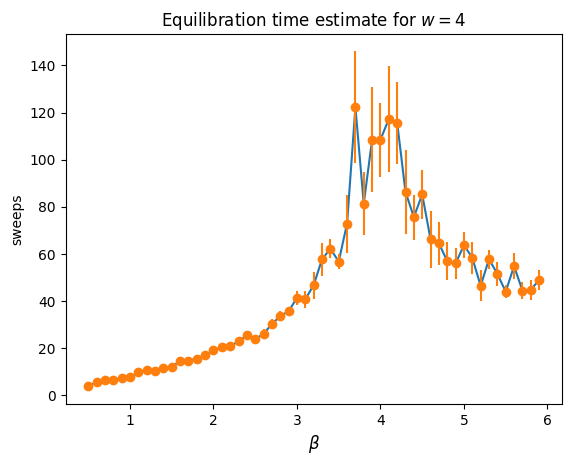

In [16]:
# read data and produce plot
with h5py.File('data/equilibration.hdf5','r') as f:
    dataset = f"eq-times-w{width}"
    eq_times = f[dataset][()]

    averages = []
    errors = []
    for i in range(eq_times.shape[0]):
        results = eq_times[i,:]
        averages.append(np.mean(results))
        errors.append(np.std(results)/np.sqrt(len(results) - 1))

    plt.plot(betas,averages)
    plt.errorbar(betas,averages,yerr=errors,fmt='o')

    plt.xlabel(r'$\beta$', fontsize=12)
    plt.ylabel('sweeps')
    plt.title(fr'Equilibration time estimate for $w = {width}$')